In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Project Overview

Objective: Analyze which countries have the best life expectancy.

Data source: Data comes from https://www.kaggle.com/datasets/shreyasg23/life-expectancy-averaged-dataset and has several different datapoints from 179 unique values.

# 2. Data Collecting and Loading

## Load Data:

In [93]:
life_expectancy = pd.read_csv('life-expectancy-data-averaged.csv')

## Initial Check:

In [94]:
life_expectancy.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000


## Select Options

In [95]:
life_expectancy.loc[:, ['Country', 'Region', 'Year', 'Infant_deaths', 'Adult_mortality', 'Population_mln', 'Life_expectancy']]

life_expectancy = life_expectancy.drop(['Under_five_deaths', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling', 'Economy_status'], axis=1)



In [96]:
# just making sure correct columns were dropped

life_expectancy.head()

,Country,Region,Year,Infant_deaths,Adult_mortality,Population_mln,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,265.804969,27.450625,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,83.132969,2.969375,75.95000
2,Algeria,Africa,2007.5,26.75625,113.439281,34.820625,73.78750
3,Angola,Africa,2007.5,88.76875,297.844063,21.623750,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,142.478813,0.085000,75.35000


# 3. Data Cleaning and Preparation 

## Handle missing files: 

There are no missing values in the dataframe, so there is nothing to fix. Shown in code below.

In [97]:
total_missing = life_expectancy.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 0


## Data Type Adjustments: 

Adjusting columns that have decimals to only having 2 decimal places, converting the column 'Year' to an int, and converting the columns 'Country' and 'Region" as categories.

In [98]:
columns_to_round = [
    'Infant_deaths', 'Adult_mortality', 'Life_expectancy'
]
life_expectancy[columns_to_round] = life_expectancy[columns_to_round].round(2)


life_expectancy['Year'] = life_expectancy['Year'].round().astype(int)


life_expectancy['Country'] = life_expectancy['Country'].astype('category')
life_expectancy['Region'] = life_expectancy['Region'].astype('category')


life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Country          179 non-null    category
 1   Region           179 non-null    category
 2   Year             179 non-null    int32   
 3   Infant_deaths    179 non-null    float64 
 4   Adult_mortality  179 non-null    float64 
 5   Population_mln   179 non-null    float64 
 6   Life_expectancy  179 non-null    float64 
dtypes: category(2), float64(4), int32(1)
memory usage: 12.8 KB


## Feature Engineering: 

I will make a category that will tell if a country has high, medium, or low life expectancy. 

### Defining these:
High: Life expectancy > 70 years. 
Medium: Life expectancy is between 50 and 70 years. 
Low: Life expectancy is < 50 years. 

In [99]:
def categorize_life_expectancy(value):
    if value < 50:
        return "Low"
    elif 50 <= value < 70:
        return "Medium"
    else:
        return "High"

life_expectancy['Life_expectancy_category'] = life_expectancy['Life_expectancy'].apply(categorize_life_expectancy)


In [100]:
# just verifying adding the category worked.

life_expectancy.head()

,Country,Region,Year,Infant_deaths,Adult_mortality,Population_mln,Life_expectancy,Life_expectancy_category
0,Afghanistan,Asia,2008,71.08,265.80,27.450625,59.66,Medium
1,Albania,Rest of Europe,2008,15.26,83.13,2.969375,75.95,High
2,Algeria,Africa,2008,26.76,113.44,34.820625,73.79,High
3,Angola,Africa,2008,88.77,297.84,21.623750,52.82,Medium
4,Antigua and Barbuda,Central America and Caribbean,2008,9.48,142.48,0.085000,75.35,High


# 4. Exploratory Data Analysis (EDA)

## Descriptive Statistics

Finding mean, median, and mode of the numerical columns. I will be excluding the year column from this, as it is all from the same year.

In [ ]:
for column in life_expectancy.columns:
    mean_value = life_expectancy['Infant_deaths'].mean().round(2)
    median_value =  life_expectancy['Infant_deaths'].median().round(2)
    min_value = life_expectancy['Infant_deaths'].min().round(2)
    max_value = life_expectancy['Infant_deaths'].max().round(2)
    
    print(f"Column: {'Infant_deaths'}")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Min: {min_value}")
    print(f"Max: {max_value}\n")
    break

for column in life_expectancy.columns:
    mean_value = life_expectancy['Adult_mortality'].mean().round(2)
    median_value =  life_expectancy['Adult_mortality'].median().round(2)
    min_value = life_expectancy['Adult_mortality'].min().round(2)
    max_value = life_expectancy['Adult_mortality'].max().round(2)
    
    print(f"Column: {'Adult_mortality'}")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Min: {min_value}")
    print(f"Max: {max_value}\n")
    break

for column in life_expectancy.columns:
    mean_value = life_expectancy['Population_mln'].mean().round(2)
    median_value =  life_expectancy['Population_mln'].median().round(2)
    min_value = life_expectancy['Population_mln'].min().round(2)
    max_value = life_expectancy['Population_mln'].max().round(2)
    
    print(f"Column: {'Population_mln'}")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Min: {min_value}")
    print(f"Max: {max_value}\n")
    break

for column in life_expectancy.columns:
    mean_value = life_expectancy['Life_expectancy'].mean().round(2)
    median_value =  life_expectancy['Life_expectancy'].median().round(2)
    min_value = life_expectancy['Life_expectancy'].min().round(2)
    max_value = life_expectancy['Life_expectancy'].max().round(2)
    
    print(f"Column: {'Life_expectancy'}")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Min: {min_value}")
    print(f"Max: {max_value}\n")
    break

Finding the countries with the top 10 life expectancies.

In [109]:
top_10_expectancy = life_expectancy.nlargest(10, 'Life_expectancy')

print(top_10_expectancy)

bottom_10_expectancy = life_expectancy.nsmallest(10, 'Life_expectancy')

print(bottom_10_expectancy)

         Country          Region  Year  Infant_deaths  Adult_mortality  \
82         Japan            Asia  2008           2.58            64.52   
154  Switzerland  Rest of Europe  2008           4.14            61.56   
73       Iceland  Rest of Europe  2008           2.41            59.15   
80         Italy  European Union  2008           3.66            62.06   
7      Australia         Oceania  2008           4.31            65.96   
148        Spain  European Union  2008           3.50            70.45   
153       Sweden  European Union  2008           2.79            62.07   
58        France  European Union  2008           3.34            87.90   
79        Israel     Middle East  2008           4.17            65.66   
30        Canada   North America  2008           5.07            72.63   

     Population_mln  Life_expectancy Life_expectancy_category  
82       127.628125            82.46                     High  
154        7.660625            81.68                     

## Data Visualizations

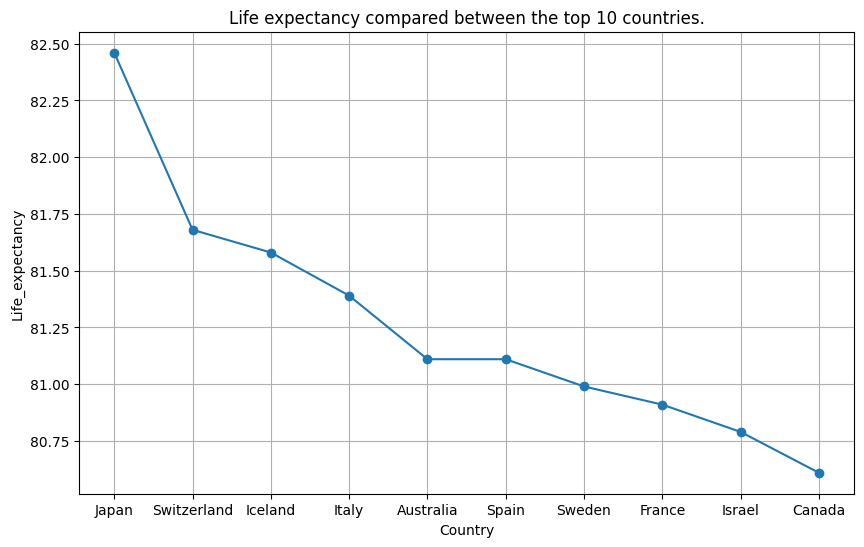

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(top_10_expectancy['Country'], top_10_expectancy['Life_expectancy'], marker='o', linestyle='-')
plt.title('Life expectancy compared between the top 10 countries.')
plt.xlabel('Country')
plt.ylabel('Life_expectancy')
plt.grid(True)
plt.show()

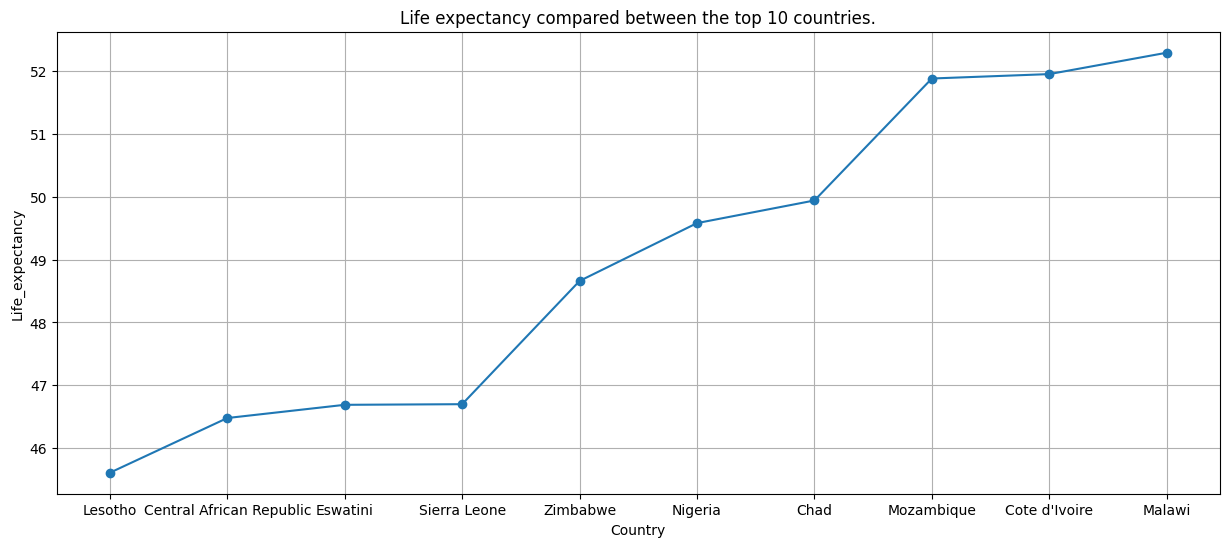

In [111]:
plt.figure(figsize=(15, 6))
plt.plot(bottom_10_expectancy['Country'], bottom_10_expectancy['Life_expectancy'], marker='o', linestyle='-')
plt.title('Life expectancy compared between the top 10 countries.')
plt.xlabel('Country')
plt.ylabel('Life_expectancy')
plt.grid(True)
plt.show()

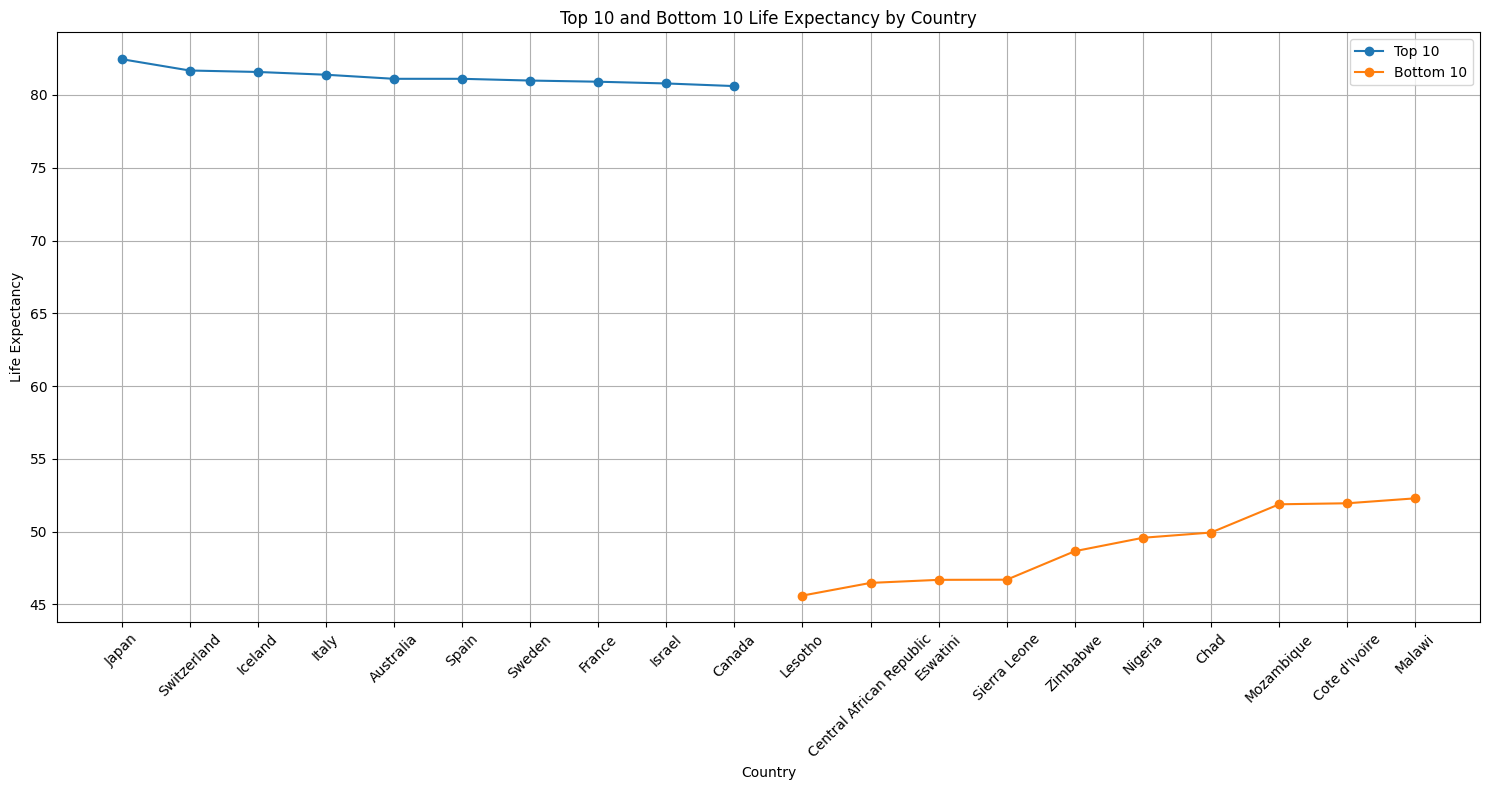

In [115]:
plt.figure(figsize=(15, 8))
plt.plot(top_10_expectancy['Country'], top_10_expectancy['Life_expectancy'], marker='o', linestyle='-', label='Top 10')
plt.plot(bottom_10_expectancy['Country'], bottom_10_expectancy['Life_expectancy'], marker='o', linestyle='-', label='Bottom 10')

plt.title('Top 10 and Bottom 10 Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate country labels for better visibility
plt.tight_layout()
plt.show()

# 5. Analysis and Insights

## Findings

Counties with high life expectancy seem to 

## Supporting Data:

text here

# 6. Conclusion and Recommendations

## Summarize: Present the main conclusions drawn from the analysis.

text here 

## Recommendations:

text here